# CS 696 Project
## Titanic: Machine Learning from Disaster

[![]( https://img.shields.io/badge/Python-v3.7-orange)]()
[![](https://img.shields.io/badge/pandas-v1-blue)]()
[![](https://img.shields.io/badge/sklearn-v0.2-red)]()

#### Parth Thummar  824679473
#### leyu,lin(Jack) 817372912

***

## Index
*  <b>Introduction</b>
  * [DataSet Source Link](https://www.kaggle.com/c/titanic)
      * goal
      * Imports
      * <a href="#fp">File Path</a>
  * <a href="#check">Data Checking</a>
      * Miss values
  * <a href="#model">Obersvation & Questions</a>
        * <a href="#Q1">Question 1</a>
        * <a href="#Q2">Question 2</a>
        * <a href="#Q3">Question 3</a>
        * <a href="#Q4">Question 4</a>
        * <a href="#Q5">Question 5</a>
        * <a href="#Q6">Question 6</a>
  * <a href="#TT">Fix Missing Values</a>
        * Randomforest fill values
  * <a href="#ML">ML Solve Problem</a>
        * <a href="#LR">Logistic Regression</a>
        * <a href="#DT">Random Forest</a>
* <b><a href="#End">Difficulties & Thoughts</a></b>

***

### Introduction

This is a classic challenge from Kaggle. We are analyzing data from the Titanic to determine what may have determined whether you were survived or not. Some of these factors (that we will be analyzing below) include age, gender, ticket prices, family types, etc. As the actual movie Titanic portrayed how the rich vs poor were always favored, we wanted to see how some of other factors may have also resulted in the favorability of Surviving. 

#### goal

The goal of this assignment was to analyze and infer patterns/circumstances that determined whether passengers were survived on the Titanic. Also complete this chanllege and see where we at in kaggle. These circumstances include 
age, gender, parents, # of siblings, the amount paid for a first class ticket versus non-first class, and many others. As we have seen from the actual movie Titanic, some of these circumstances did indeed determine whether someone was survived or not. However, Hollywood would can sometimes also sway details/facts for ratings, and so we both wanted to use statistical and factual data and machine learning to truly see/analyze if certain factors increased the chances of surviving versus not surviving. 

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from pandas import DataFrame,Series

### <a name="fp">File Path</a>

In [2]:
df_data = pd.read_csv("train.csv")    
df_test = pd.read_csv("test.csv")    

### <a name="check">Data Checking</a>

In [3]:
df_data.columns                       
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### <a name="MV">Missing Values</a>
Age is not 891
Cabin is not 891
Embarked is not 891
* if value is too high, may just delete it
* if value is not numeric, add NaN column
* In this case, age is an increasing series. May add step of 0.5 or
add some value base on value we have, since data set was not large
probably not goode idea

In [4]:
df_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### <a name="model">Observations & Questions</a>

I put questions may interested below

#### <a name="Q1">1. Is embarked city, passenger class level, and sex associated with the number of people survived?</a>

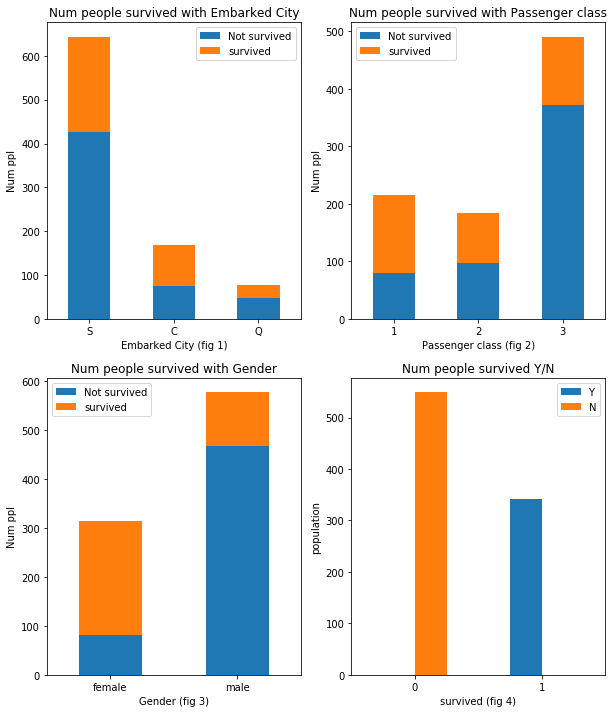

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2)

# Embarked City
Survived_0_ec=df_data.Embarked [df_data.Survived==0]
Survived_1_ec=df_data.Embarked [df_data.Survived==1]
df=DataFrame({'Not survived':Survived_0_ec.value_counts(),
              'survived':Survived_1_ec.value_counts()})

p1= df.plot(kind='bar',
        stacked=True,
        figsize=(10,12),
        rot=0,
        ax=axes[0,0])
p1.set_xlabel("Embarked City (fig 1)") 
p1.set_ylabel("Num ppl")
p1.set_title("Num people survived with Embarked City")


# Passenger class
Survived_0_pc=df_data.Pclass [df_data.Survived==0]
Survived_1_pc=df_data.Pclass [df_data.Survived==1]
df=DataFrame({'Not survived':Survived_0_pc.value_counts(),
              'survived':Survived_1_pc.value_counts()})

p2= df.plot(kind='bar',
        stacked=True,
        figsize=(10,12),
        rot=0,
        ax=axes[0,1])

p2.set_xlabel("Passenger class (fig 2)") 
p2.set_ylabel("Num ppl")
p2.set_title("Num people survived with Passenger class")


# Gender
Survived_0_sx=df_data.Sex [df_data.Survived==0]
Survived_1_sx=df_data.Sex [df_data.Survived==1]
df=DataFrame({'Not survived':Survived_0_sx.value_counts(),
              'survived':Survived_1_sx.value_counts()})

p3= df.plot(kind='bar',
        stacked=True,
        figsize=(10,12),
        rot=0,
        ax=axes[1,0])

p3.set_xlabel("Gender (fig 3)") 
p3.set_ylabel("Num ppl")
p3.set_title("Num people survived with Gender")


# Without all three above
Survived_N= df_data.Survived[df_data.Survived==0]
Survived_Y= df_data.Survived[df_data.Survived==1]
df=DataFrame({'Y':Survived_Y.value_counts(),
              'N':Survived_N.value_counts()})
p4= df.plot(kind='bar',
        figsize=(10,12),
        rot=0,
        ax=axes[1,1])

p4.set_xlabel("survived (fig 4)")
p4.set_ylabel("population")
p4.set_title("Num people survived Y/N")

plt.legend(loc='upper right')
plt.show()

#### Fig 1. 
survived rate C> S > Q
From [Wiki list](https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic) we know 
C stands for Cherbourg, S stands for Southampton, Q stands for Queenstown.
Cherbourg seems best Embarked City

#### Fig 2. 
survived rate 1 > 2 > 3
class 3 Passengers most not survived

#### Fig 3. 
survived rate female >> male
female passengers haave significant survived rate compare to male 

#### Fig 4. 
total passengers survived more than passengers not survived

#### <a name="Q2">2. From question 1, Cherbourg and Class 1 has the better ratio. What passenger rate does each class have in each Embarked City? Is it associated with survived rate?</a>

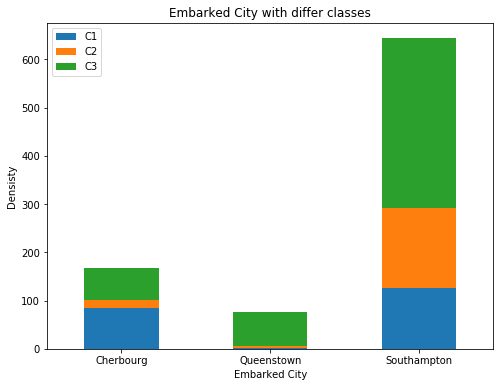

In [6]:
Pc1=df_data.Embarked [df_data.Pclass==1]
Pc2=df_data.Embarked [df_data.Pclass==2]
Pc3=df_data.Embarked [df_data.Pclass==3]

df=DataFrame({'C1':Pc1.value_counts(),
              'C2':Pc2.value_counts(),
              'C3':Pc3.value_counts()})

#replace names with letters
df.index = {'Cherbourg':'C','Queenstown':'Q','Southampton':'S'}

df.plot(kind='bar',
        stacked=True,
        figsize=(8,6),
        rot=0)

plt.xlabel("Embarked City") 
plt.ylabel("Densisty")
plt.title("Embarked City with differ classes")
plt.show()

#### From fig above. Queenstown City seems have no passenger is class 1, this may have huge impact on ratio

In [7]:
# check this city how many class 1 it has
df_data[(df_data.Pclass==1) & (df_data.Embarked =='Q')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0,C78,Q
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0,C78,Q


Only 2 passenger is class 1 in Queenstown City, fig2 result may affected

#### <a name="Q3">3. From question 2 only 2 passengers in Queenstwon City is class 1. Why? Does it have to do with the ticket price?</a>

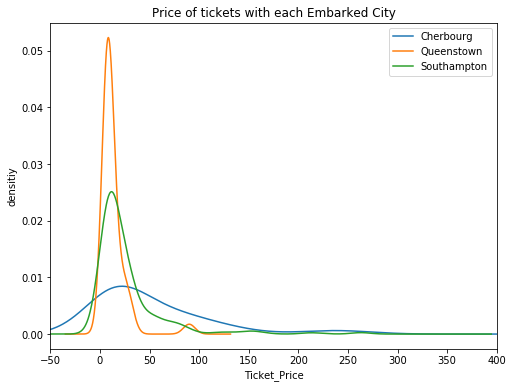

In [8]:
ticket_price_C =df_data.Fare[df_data.Embarked =='C']
ticket_price_Q =df_data.Fare[df_data.Embarked =='Q']
ticket_price_S =df_data.Fare[df_data.Embarked =='S']

df=DataFrame({'Cherbourg':ticket_price_C,
              'Queenstown':ticket_price_Q,
              'Southampton':ticket_price_S})

df.plot(kind='kde',xlim=[-50,400],figsize=(8,6))
plt.xlabel("Ticket_Price") 
plt.ylabel("densitiy")
plt.title("Price of tickets with each Embarked City")
plt.show()

Queenstown City price most at 0 - 50, Why class 1 is only 2 passenger? Is price affect class?

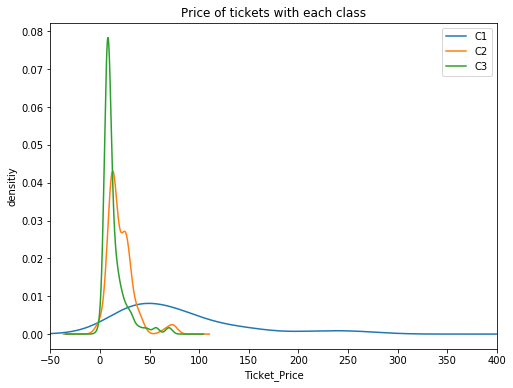

In [9]:
#check class  associated with price 
ticket_price_p1 =df_data.Fare[df_data.Pclass==1]
ticket_price_p2 =df_data.Fare[df_data.Pclass==2]
ticket_price_p3 =df_data.Fare[df_data.Pclass==3]
df=DataFrame({'C1':ticket_price_p1,
              'C2':ticket_price_p2,
              'C3':ticket_price_p3})

df.plot(kind='kde',xlim=[-50,400],figsize=(8,6))

plt.xlabel("Ticket_Price") 
plt.ylabel("densitiy")
plt.title("Price of tickets with each class")
plt.show()

Class 1 has it very low at 0-50, but has highest price. Passenger may not want to buy expensive class.
Or passenger in Queenstown City is not rich. 

#### <a name="Q4">4. If a passenger paid more, does it mean they have a higher chance of surviving?</a>

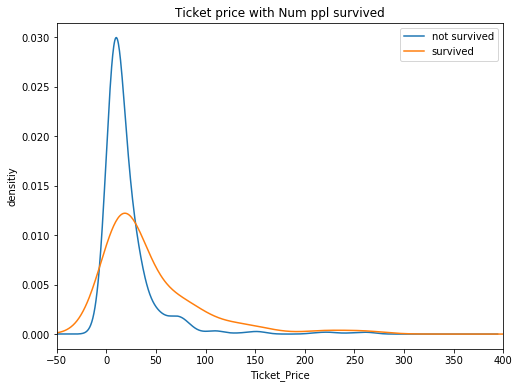

In [10]:
survived_0price=df_data.Fare[df_data.Survived==0]
survived_1price=df_data.Fare[df_data.Survived==1]
df=DataFrame({'not survived':survived_0price,
              'survived':survived_1price})

df.plot(kind='kde',xlim=[-50,400],figsize=(8,6))

plt.xlabel("Ticket_Price") 
plt.ylabel("densitiy")
plt.title("Ticket price with Num ppl survived")
plt.show()

The most passenger are at 0-50 range, as price go up, two line also match each other.
If passenger pay more, may have higher chance of surviving.

#### <a name="Q5">5. Does age do with the higher chance of surviving? Since younger people are stronger, however older people may have more money.</a>

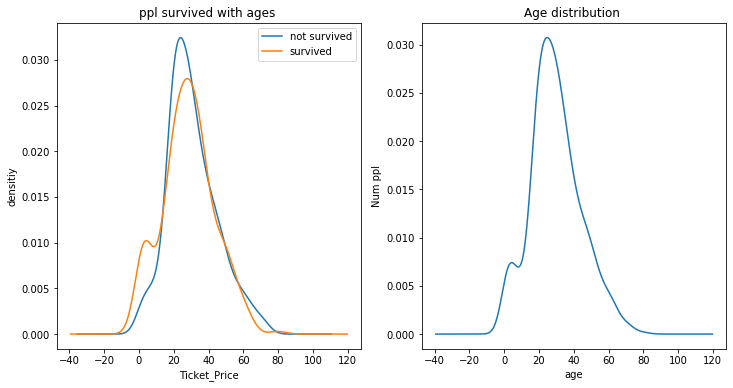

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)

survived_0age=df_data.Age[df_data.Survived==0]
survived_1age=df_data.Age[df_data.Survived==1]

df=DataFrame({'not survived':survived_0age,'survived':survived_1age})
p1= df.plot(kind='kde',figsize=(12,6),ax=axes[0])
p1.set_xlabel("Ticket_Price") 
p1.set_ylabel("densitiy")
p1.set_title("ppl survived with ages ")

p2= df_data.Age.plot(kind='kde',ax=axes[1])
p2.set_xlabel("age") 
p2.set_ylabel("Num ppl")
p2.set_title("Age distribution ")


plt.show()

Lots 20-40 not survived and below 10 most survived. What exact number in those range?

In [12]:
df_data.Age[(df_data.Age > 20) & (df_data.Age<40) & (df_data.Survived==0)].count()

225

In [13]:
df_data.Age[(df_data.Age > 20) & (df_data.Age<40)].count()

372

In [14]:
df_data.Age[(df_data.Age<10) & (df_data.Survived==1)].count()

38

In [15]:
# toatl number ppl age below 10
df_data.Age[df_data.Age<10].count()

62

225 out of 372 almost 60% people age between 20 and 40 not survived.. 38 out of 60 for age below 10 is very high 

#### <a name="Q6">6. From question 4, people that are 20-40 years of age may have siblings or kids. Does that impact the survived rate? Suppose I have 10 siblings, I may have less chance. Or if I have 10 kids. Hard to rescue them all.</a>

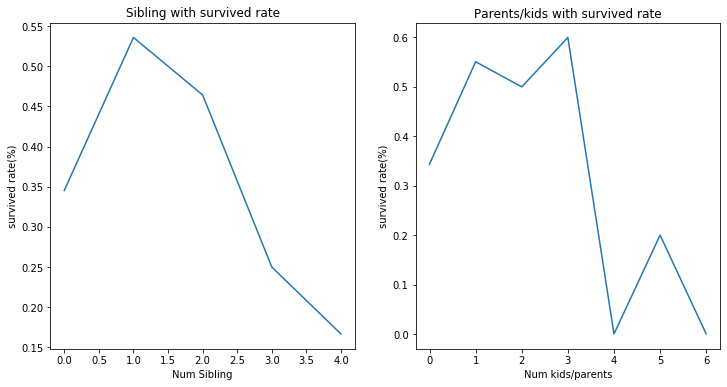

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2)

survived_0SB=df_data.SibSp[df_data.Survived==0].value_counts()
survived_1SB=df_data.SibSp[df_data.Survived==1].value_counts()

total=survived_0SB + survived_1SB
survived_rate=survived_1SB/total
survived_rate=survived_rate.sort_index()

p1 = survived_rate.plot(figsize=(12,6),ax=axes[0])
p1.set_xlabel("Num Sibling") 
p1.set_ylabel("survived rate(%)")
p1.set_title("Sibling with survived rate")


survived_0kid=df_data.Parch[df_data.Survived==0].value_counts()
survived_1kid=df_data.Parch[df_data.Survived==1].value_counts()

#fill those no has any kid or parent with 0
survived_1kid=Series(survived_1kid,index=survived_0kid.index)
survived_1kid=survived_1kid.fillna(0)

total=survived_0kid + survived_1kid
survived_rate_wkid=survived_1kid/total
survived_rate_wkid=survived_rate_wkid.sort_index()

p2 = survived_rate_wkid.plot(figsize=(12,6),ax=axes[1])
p2.set_xlabel("Num kids/parents") 
p2.set_ylabel("survived rate(%)")
p2.set_title("Parents/kids with survived rate")


plt.show()

From fig above, we can infer that if passengers had more than 3 kids or have parents, it is harder to handle.
1 sibling seems to have the highest survive rate, however, over 2 siblings has a significantly lower survived rate.

### <a name="TT">Fix Missing Values</a> 

I was also inspired by this link [Titanic Report](https://www.math.lsu.edu/system/files/Titanic%20Report.pdf) 

In [17]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### cabin has lots missing and I looked up cant find online resource to fill it. So I mark Y/N to cabin.

In [18]:
def set_cabin_type(df):
    df.loc[(df.Cabin.notnull()),'Cabin']='Y'
    df.loc[(df.Cabin.isnull()),'Cabin']='N'
    return df

df_data=set_cabin_type(df_data)

#### use RandomForest fill age from sklearn

In [19]:
from sklearn.ensemble import RandomForestRegressor

def set_missing_ages(df):
    # put more features to randoemforest for better fit
    df_age = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    age_known=df_age.loc[df_age.Age.notnull()].values 
    age_unknown=df_age.loc[df_age.Age.isnull()].values
    X=age_known[:,1:]
    y=age_known[:,0]
    
    # build model
    model = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    model.fit(X,y)
    predictedAges=model.predict(age_unknown[:,1:])
    df.loc[df.Age.isnull(),'Age']=predictedAges
    return df,model

df_data,model=set_missing_ages(df_data)  

Since some features are either strings or objects, we need to mark them as numeric value.

In [20]:
num_cabin = pd.get_dummies(df_data.Cabin,prefix='Cabin') 
num_embarked = pd.get_dummies(df_data['Embarked'], prefix= 'Embarked')
num_sex = pd.get_dummies(df_data['Sex'], prefix= 'Sex')
num_pclass = pd.get_dummies(df_data['Pclass'], prefix= 'Pclass')

df = pd.concat([df_data, num_cabin, num_embarked, num_sex, num_pclass], axis=1) 
#  clean prefix
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True) 

Scaling. If the age gap is too large, it may affect the prediction.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
age_scale=scaler.fit(df.Age.values.reshape(-1,1))
df['Age_Scale']=scaler.fit_transform(df.Age.values.reshape(-1,1),age_scale)

fare_scale=scaler.fit(df.Fare.values.reshape(-1,1))
df['Fare_Scale']=scaler.fit_transform(df.Age.values.reshape(-1,1),fare_scale)
df.drop(['Age', 'Fare'], axis=1, inplace=True)

### <a name="ML">ML Solve Problem</a>

#### <a name="LR">Logistic Regression</a>

Similarly, for test data, do what we did for train data.

In [22]:
from sklearn.linear_model import LogisticRegression
df_train=df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*').values 
df_feature=df_train[:,1:]

df_label=df_train[:,0]

model_1=LogisticRegression(C=1.0, penalty='l1', tol=1e-6,solver='liblinear')

model_1.fit(df_feature,df_label)
model_1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=1e-06, verbose=0,
                   warm_start=False)

In [23]:
df_test.loc[df_test.Fare.isnull(),'Fare']=0
df_test= set_cabin_type(df_test)
age_data = df_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
age_test=age_data[age_data.Age.isnull()].values

predictedAges = model.predict(age_test[:,1:])
df_test.loc[df_test.Age.isnull(),'Age'] = predictedAges

# use get dummies since test is 418x13 but train is 819x13
num_cabin = pd.get_dummies(df_test.Cabin, prefix= 'Cabin')
num_sex = pd.get_dummies(df_test.Sex, prefix= 'Sex')
num_pclass = pd.get_dummies(df_test.Pclass, prefix= 'Pclass')
num_embarked = pd.get_dummies(df_test.Embarked, prefix= 'Embarked')

df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1, 1), age_scale)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1, 1), fare_scale)

concated_df_test = pd.concat([df_test, num_cabin, num_embarked, num_sex, num_pclass], axis=1)
concated_df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked','Age','Fare'], axis=1, inplace=True)

In [24]:
df_test_val = concated_df_test.values

In [25]:
predict_result=model_1.predict(df_test_val[:,1:])
predict_result

array([1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

construct dataframe output result csv

In [26]:
result = pd.DataFrame({'PassengerId':df_test['PassengerId'].values, 'Survived':predict_result.astype(np.int32)})
result.to_csv("predict.csv", index=False)
pd.read_csv("predict.csv")

,PassengerId,Survived
0,892,1
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


construct dataframe output result csv

We submitted predict.csv to kaggle and got [kaggle score](https://www.kaggle.com/c/titanic/leaderboard#score) 63%.
It was lower than what I expected

#### <a name="DT">Random Forest</a>

We try to improve our score a bit. 
* group sibling and kid to 'family' 
* Omit cabin not label Y/N
* fill age use median value
* fill fare use median value
* fill missing Embarked as letter S
* Since S the City has most passenger from observation

In [27]:
# fill fare use median value
df_data["Fare"] = df_data["Fare"].fillna(df_data["Fare"].median())
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].median())

# group sibling and kid to 'family' 
df_data.insert(9,"Family", "Empty")
df_data["Family"] = df_data["SibSp"] + df_data["Parch"]
df_test.insert(8,"Family", "Empty")
df_test["Family"] = df_test["SibSp"] + df_test["Parch"]

#fill Embarked city
df_data['Embarked'] = df_data['Embarked'].fillna('S')

In [28]:
# Function that returns a table with the median age for passengers from a certain class, sex and title
def calc_age(df, cl, sx):
    a = df.groupby(["Pclass", "Sex"])["Age"].median()
    return a[cl][sx]

# Loops over the df and replace the missing ages (train)
for i, row in df_data.iterrows():
    if pd.isna(row['Age']) :
        newage = (calc_age(df_data, row["Pclass"], row["Sex"]))
        df_data.at[i,'Age'] = newage
    else: continue
# Same for test data
for i, row in df_test.iterrows():
    if pd.isna(row['Age']) :
        newage = (calc_age(df_test, row["Pclass"], row["Sex"]))
        df_test.at[i,'Age'] = newage
    else: continue

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

y = df_data["Survived"]

features = ["Pclass", "Sex", "Family", "Fare", "Age", "Embarked"]

#encode_train = OneHotEncoder().fit_transform(df_data[features])
#encode_test = OneHotEncoder().fit_transform(df_test[features])

# use onehot encoder
X = pd.get_dummies(df_data[features])
X_test = pd.get_dummies(df_test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

result = pd.DataFrame({'PassengerId':df_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("predict2.csv", index=False)
pd.read_csv("predict2.csv")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


We submitted predict2.csv to kaggle and got [kaggle score](https://www.kaggle.com/c/titanic/leaderboard#score) 79%, 
a 16% improvement by using RandomForest.

### <a name="End">Difficulties/Thoughts</a>

The missing value was biggest challenge. The cabin was missing too much. I was think to just marked it with Yes or No, but it not go so well. Also the age was hard to fill. I notice some age has very huge gap and impact the results.

While we were not able to conclude on all factors we analyzed, we were able to show how certain factors that did prove to be essential in determining whether a passenger was survived over someone that was not. These factors included gender, class level within the ship, the amount the passenger paid for the ticket, and age. 

We learned fully analyze dataset is important before starting with modeal prediction. It can help us see the track of how it should be done in what ways. We also see so many ways for fill mising value. For example I fill missing Embarked City with 'S' base on obersvation I have done.

Overall, we feel were able to adequetly show certain patterns/factors that would have determined whether a passenger was survived or not. What definitely got in the way of our results was some data was missing such as cabin values. We used Linear Regression and RandomForest to try and improve the test and train data by filling in these missing values. Using Random Forest, were able to get a 16% improvement when submitted to kaggle score. 


nide write up
100/100